# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]
print(y.shape)

(97, 2)
(97,)


Text(0, 0.5, 'Bénéfice x1000')

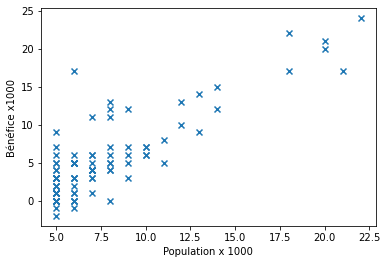

In [4]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [5]:
def computeCost(X, y, theta):
    
    m = len(y)
    h = np.dot(X, theta)
    J = (1/(2*m)) * np.sum((h - y)**2)
    return J



2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [6]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    m = X.shape[0]
    y=y.reshape((m,1))
    costs = []
    
    for i in range(iterations):
        h_y = np.dot(X, theta) - y
        htheta = np.dot(X.T, h_y )
        derive_mse = 1/m * htheta
        theta = theta - (alpha * derive_mse)
        mse = computeCost(X, y, theta)
        costs.append(mse)
    return theta, costs


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [7]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [8]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

Text(0, 0.5, 'cost function')

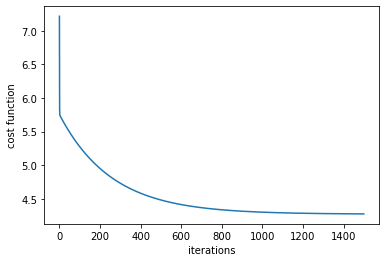

In [9]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
iters = []
theta, costs = gradientDescent(X, y, theta, alpha, iterations)
for i in range(iterations):
    iters.append(i)
plt.plot(iters,costs)
plt.xlabel('iterations')
plt.ylabel('cost function')

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

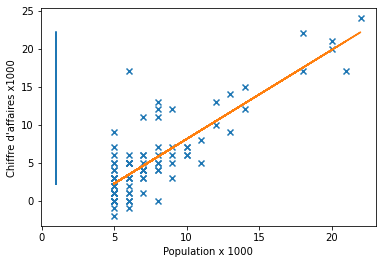

In [10]:

y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

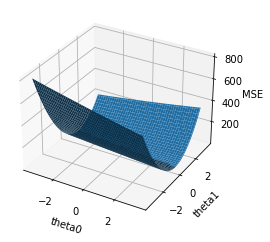

In [11]:

theta0_vals = np.arange(-3.5, 3.5, 0.05)
theta1_vals= np.arange(-3.5, 3.5, 0.05)
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)

mse = np.array([computeCost(X,y,np.array([theta0 , theta1])) for theta0,theta1 in zip(np.ravel(theta0) , np.ravel(theta1))])
mse = mse.reshape(theta0.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(theta0, theta1, mse)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('MSE')

plt.show()


Prédire des valeurs de y

In [12]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.49898053])

In [13]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.59767717])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [14]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [15]:
# d'abord créer X et y
X = dataMulti[:, :2] # Sélectionne les deux premières colonnes de dataMulti
y = dataMulti[:, 2] # Sélectionne la troisième colonne de dataMulti
# Ajouter une colonne de 1 pour l'ordonnée à l'origine
X = np.hstack((np.ones((X.shape[0], 1)), X))
print(X.shape, y.shape) 

(47, 3) (47,)


In [16]:
# redéfinissez vos fonctions de coût si cela est necessaire
def computeCostMulti(X, y, theta):
    m = len(y)
    h = X @ theta
    J = 1 / (2 * m) * np.sum((h - y) ** 2)
    return J

In [17]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
       
        h = X @ theta
        h_y = y - h
        htheta = (X.T @ h_y)
        derive_mse = -1/m * htheta
        theta = theta - (alpha * derive_mse)
        J_history[i] = computeCost(X, y, theta)
        
    return theta, J_history


Mise à l'échelle des données

Normalisation des données en moyenne = 0

In [18]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm = (X - mean) / (std + 1e-8)
print(X_norm.shape)


(47, 3)


Appliquer la descente du gradient à plusieurs variables

In [19]:
# Initialiser les paramètres
theta = np.zeros((3, 1))

# Paramètres d'apprentissage
alpha = 0.01
num_iters = 400

# Entraîner le modèle

theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)

# Afficher les paramètres optimaux
print('Paramètres optimaux :')
print(theta)



Paramètres optimaux :
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.17530212e-11 -3.88334917e-11 -5.09580629e-11 -3.03952488e-11
  -8.13817704e-11 -3.91261627e-11 -4.53145546e-11 -2.38326374e-11
  -2.82241042e-11 -2.61941821e-11 -2.71278081e-11 -4.39557640e-11
  -

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul ,    

En comparant les temps de calcul pour les deux méthodes, nous pouvons observer que la normalisation des données peut réduire considérablement le temps de calcul pour la descente du gradient. Cela est dû au fait que la normalisation des données permet une convergence plus rapide et plus stable de l'algorithme de descente du gradient

In [20]:
# Initialiser les paramètres
theta = np.zeros((3, 1))

# Paramètres d'apprentissage
alpha = 0.01
num_iters = 400

# Entraîner le modèle
start_time = time.time()
theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)
end_time = time.time()

print('Temps de calcul (avec normalisation) :', end_time - start_time, 'secondes')


Temps de calcul (avec normalisation) : 0.055792808532714844 secondes


In [21]:
# Initialiser les paramètres
theta = np.zeros((3, 1))

# Paramètres d'apprentissage
alpha = 0.01
num_iters = 400
# Entraîner le modèle
start_time = time.time()
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
end_time = time.time()

print('Temps de calcul (sans normalisation) :', end_time - start_time, 'secondes')

Temps de calcul (sans normalisation) : 0.06482696533203125 secondes


C:\Users\HP\AppData\Local\Temp\ipykernel_432\3628134826.py:5: RuntimeWarning: overflow encountered in square
  J = (1/(2*m)) * np.sum((h - y)**2)
C:\Users\HP\AppData\Local\Temp\ipykernel_432\1037702343.py:9: RuntimeWarning: overflow encountered in matmul
  htheta = (X.T @ h_y)
C:\Users\HP\AppData\Local\Temp\ipykernel_432\1037702343.py:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha * derive_mse)


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Charger les données
data = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
X = data[:, :2]
y = data[:, 2]

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entraîner le modèle
model = LinearRegression()
model.fit(X_scaled, y)

# Afficher les coefficients optimaux
print('Coefficients optimaux :')
print(model.coef_)



Coefficients optimaux :
[109447.76551898  -6578.27679028]


In [23]:
# Mesure le temps d'exécution de la fonction gradientDescentMulti
start = time.time()
theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)
end = time.time()
print(f"Temps d'exécution (gradientDescentMulti) : {end - start} secondes")

# Mesure le temps d'exécution de la fonction fit de scikit-learn
start = time.time()
model.fit(X, y)
end = time.time()
print(f"Temps d'exécution (scikit-learn) : {end - start} secondes")


Temps d'exécution (gradientDescentMulti) : 0.0488736629486084 secondes
Temps d'exécution (scikit-learn) : 0.0024628639221191406 secondes


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes